<a href="https://colab.research.google.com/github/alisharifi2000/ComplexNetwork_TMU/blob/main/ComplexNetworkProject_phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import networkx as nx
import pandas as pd
import random
%matplotlib inline
from matplotlib import pyplot as plt
import collections

In [49]:
root = '/gdrive/My Drive/ComplexNetwork/'
G = nx.read_edgelist(root + 'p2p-Gnutella06.txt', create_using=nx.DiGraph)
# G = nx.read_edgelist(root + 'p2p-Gnutella06.txt')
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 8717
Number of edges: 31525
Average in degree:   3.6165
Average out degree:   3.6165


In [4]:
print(len(G.nodes))

8717


In [5]:
print(G.edges)

[('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('0', '7'), ('0', '8'), ('0', '9'), ('0', '10'), ('6', '21'), ('6', '327'), ('6', '619'), ('6', '1828'), ('6', '2173'), ('6', '2201'), ('6', '2743'), ('6', '2744'), ('6', '2745'), ('6', '2746'), ('8', '372'), ('8', '437'), ('8', '816'), ('8', '1826'), ('8', '1913'), ('8', '2303'), ('8', '2734'), ('8', '2735'), ('8', '2736'), ('8', '2737'), ('9', '35'), ('9', '321'), ('9', '446'), ('9', '1184'), ('9', '1542'), ('9', '2738'), ('9', '2739'), ('9', '2740'), ('9', '2741'), ('9', '2742'), ('10', '170'), ('10', '556'), ('10', '558'), ('10', '882'), ('10', '1059'), ('10', '2752'), ('10', '2753'), ('10', '2754'), ('10', '2755'), ('10', '2756'), ('327', '1458'), ('327', '2111'), ('327', '3941'), ('327', '4240'), ('327', '4271'), ('327', '5330'), ('327', '5331'), ('327', '5332'), ('327', '5333'), ('327', '5334'), ('1828', '60'), ('1828', '579'), ('1828', '1119'), ('1828', '1561'), ('1828', '2756'), ('1828', '3296'), ('1828',

In [6]:
degree_sequence = []
for node, degree in G.degree():
    degree_sequence.append(degree)
degree_sequence = sorted(degree_sequence, reverse=True)

In [7]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

In [8]:
degree_sequence[:10]

[115, 73, 72, 70, 70, 69, 69, 69, 67, 67]

In [9]:
in_degree_sequence = []
for node, degree in G.in_degree():
    in_degree_sequence.append(degree)
in_degree_sequence = sorted(in_degree_sequence, reverse=True)

In [10]:
in_degree_sequence = sorted((d for n, d in G.in_degree()), reverse=True)

In [11]:
for node, degree in G.degree():
    if degree in [115, 73, 72, 70, 69, 67]:
        print(node)

556
558
31
173
176
356
293
299
300
6494


In [12]:
dmax = max(degree_sequence)
dmax

115

In [13]:
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
print(deg)

(115, 73, 72, 70, 69, 67, 66, 64, 63, 62, 60, 59, 58, 57, 56, 55, 54, 53, 51, 50, 49, 48, 47, 46, 45, 44, 42, 41, 40, 39, 38, 37, 36, 35, 34, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)


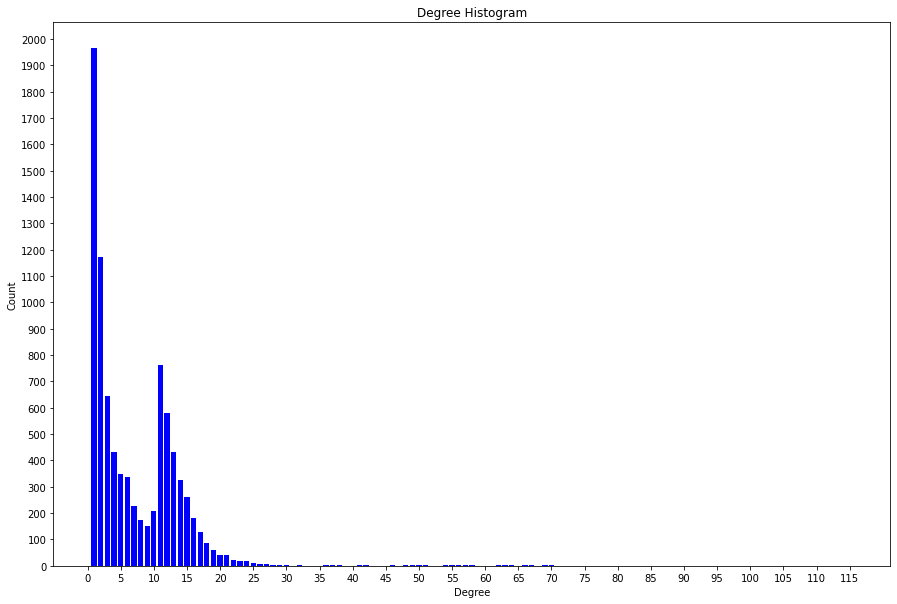

In [14]:
plt.figure(figsize=(15,10))
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks(range(0,dmax+5,5))
plt.yticks(range(0,2100,100))
plt.show()

In [15]:
pos = nx.spring_layout(G)

In [16]:
type(pos)

dict

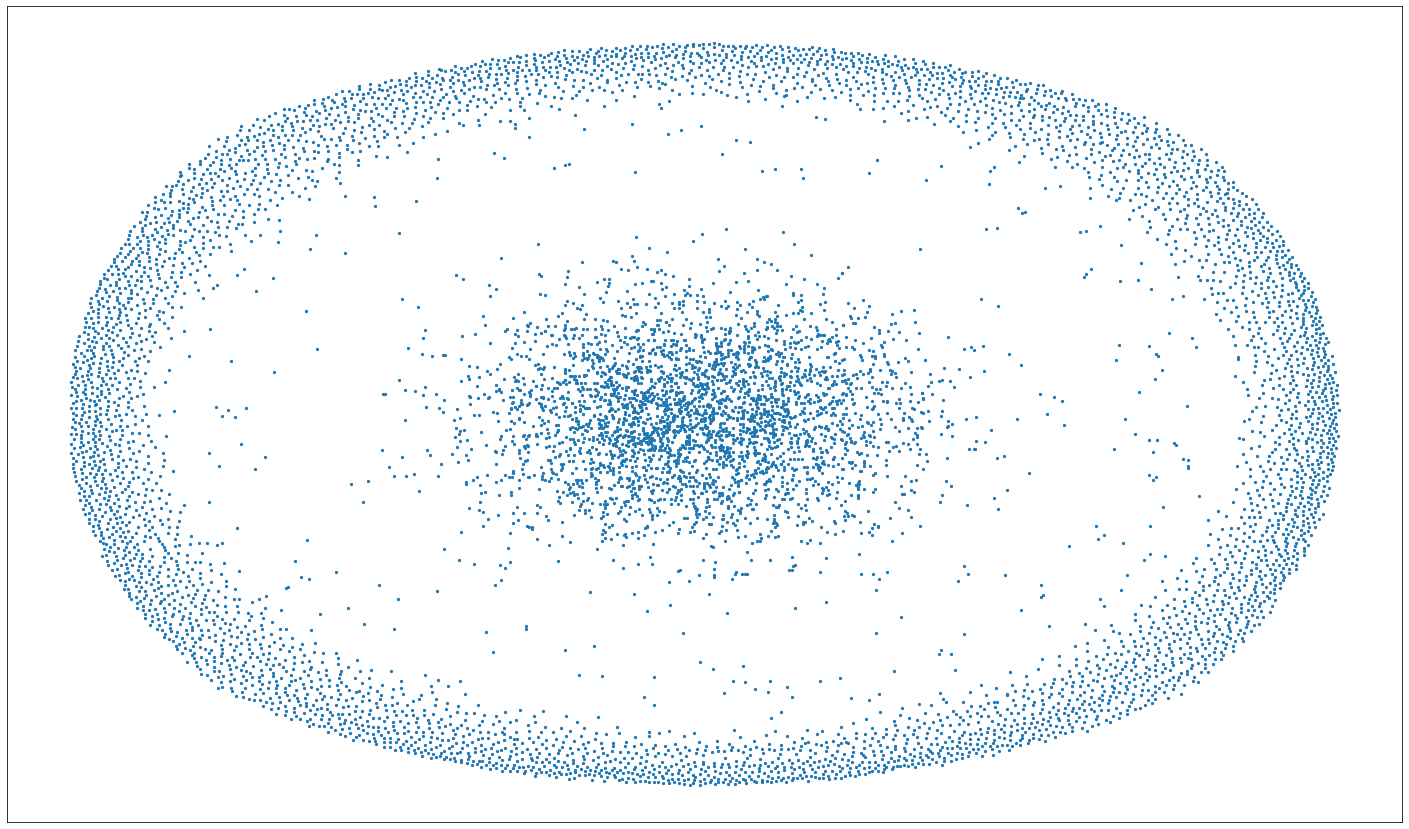

In [17]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(G, pos, node_size=5)
plt.show()

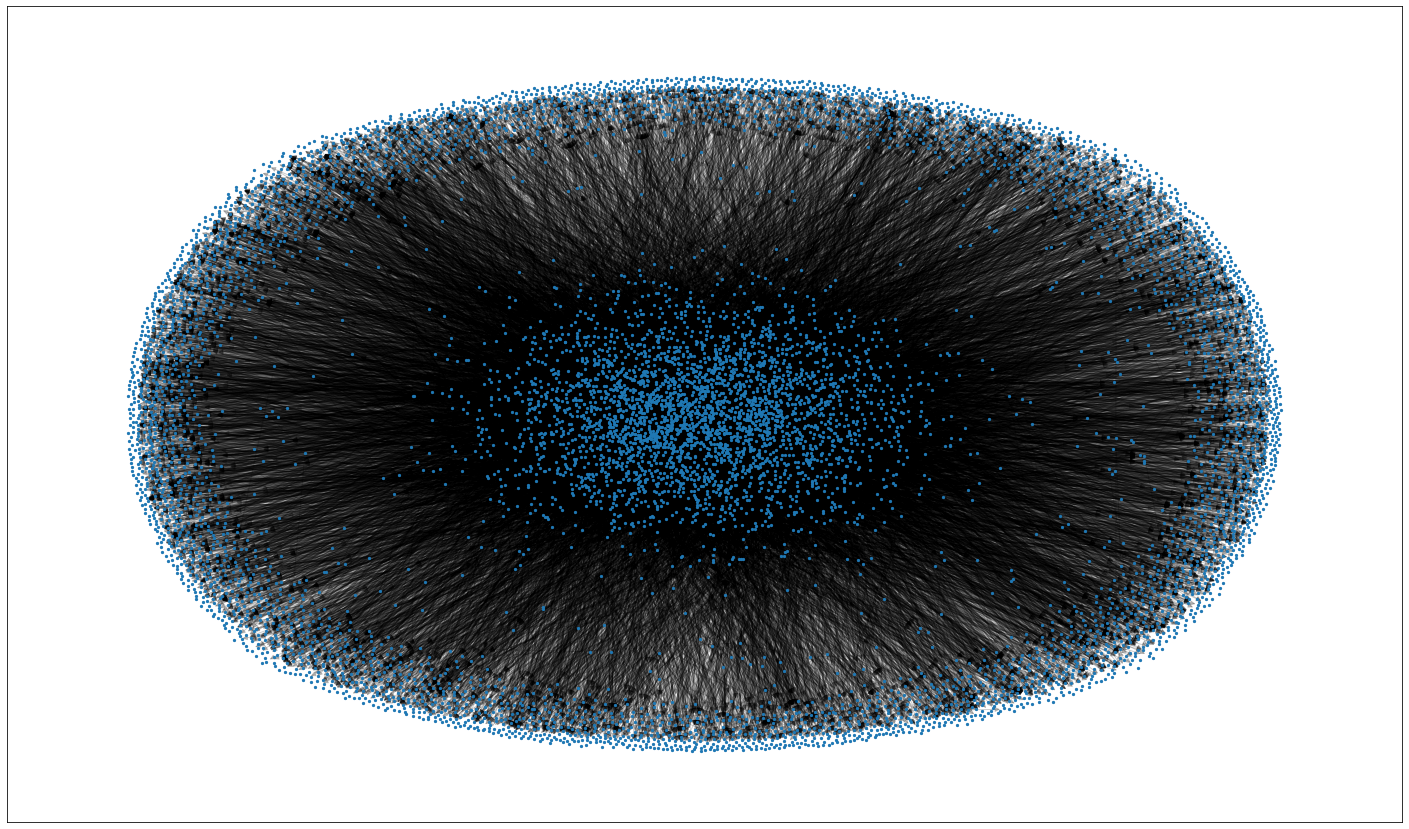

In [18]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(G, pos, node_size=5)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.show()

In [19]:
s_path = nx.average_shortest_path_length(G)
print('average shortest path : {}'.format(s_path))

average shortest path : 2.4515828475878316


In [20]:
 nx.shortest_path(G, source='0', target='1010')

['0', '10', '556', '341', '231', '237', '2098', '2221', '1010']

In [21]:
length = dict(nx.all_pairs_shortest_path_length(G))
df = pd.DataFrame.from_dict(length)
df.head()

0    1   2   3   4   5    6  ...  8706  8710  8711  8712  8713  8714  8716
0   0.0  NaN NaN NaN NaN NaN  6.0  ...   NaN   NaN   8.0   NaN   NaN   6.0   5.0
1   1.0  0.0 NaN NaN NaN NaN  7.0  ...   NaN   NaN   8.0   NaN   NaN   6.0   6.0
7   1.0  NaN NaN NaN NaN NaN  3.0  ...   NaN   NaN   5.0   NaN   NaN   5.0   4.0
6   1.0  NaN NaN NaN NaN NaN  0.0  ...   NaN   NaN   7.0   NaN   NaN   4.0   5.0
10  1.0  NaN NaN NaN NaN NaN  6.0  ...   NaN   NaN   7.0   NaN   NaN   5.0   5.0

[5 rows x 8717 columns]

In [22]:
# s_paths = dict(nx.all_pairs_shortest_path(G))
# df = pd.DataFrame.from_dict(s_paths)
# df.fillna('[]',inplace = True)
# df.head()

In [23]:
# df.shape

In [24]:
# df.to_csv(root+'shortest_path.csv',index = False)

In [25]:
df = pd.read_csv(root+'shortest_path.csv')
df.head()

0  ...                                               8716
0       ['0']  ...       ['8716', '5114', '2181', '4949', '260', '0']
1  ['0', '1']  ...  ['8716', '5114', '2181', '4949', '260', '0', '1']
2  ['0', '2']  ...  ['8716', '5114', '2181', '4949', '260', '0', '2']
3  ['0', '3']  ...      ['8716', '5114', '7115', '3402', '3126', '3']
4  ['0', '4']  ...  ['8716', '5114', '2181', '4949', '260', '0', '4']

[5 rows x 8717 columns]

In [26]:
# def find_len(x):
#     return len(x)

# temp = df.copy()
# for cols in temp.columns:
#     temp[cols] = temp[cols].apply(find_len)

# temp.head()

In [27]:
# temp.max(axis=1)

In [28]:
# temp.idxmax(axis=1)

In [29]:
# df.to_csv(root+'shortest_path.csv',index = False)

In [30]:
df = pd.read_csv(root+'shortest_path.csv')
df.head()

0  ...                                               8716
0       ['0']  ...       ['8716', '5114', '2181', '4949', '260', '0']
1  ['0', '1']  ...  ['8716', '5114', '2181', '4949', '260', '0', '1']
2  ['0', '2']  ...  ['8716', '5114', '2181', '4949', '260', '0', '2']
3  ['0', '3']  ...      ['8716', '5114', '7115', '3402', '3126', '3']
4  ['0', '4']  ...  ['8716', '5114', '2181', '4949', '260', '0', '4']

[5 rows x 8717 columns]

In [31]:
del df

In [16]:
largest_scc = max(nx.strongly_connected_components(G), key=len)

In [17]:
SCC = G.subgraph(largest_scc)

In [18]:
print(list(SCC.edges))

[('6828', '499'), ('6828', '5202'), ('6828', '5638'), ('6828', '6855'), ('6828', '7543'), ('4020', '291'), ('4020', '292'), ('4020', '293'), ('4020', '296'), ('4020', '299'), ('4020', '300'), ('4020', '351'), ('4020', '353'), ('4020', '357'), ('4020', '4488'), ('5510', '670'), ('5510', '1487'), ('5510', '4798'), ('5510', '6913'), ('5839', '1089'), ('5839', '2002'), ('5839', '2212'), ('350', '471'), ('350', '553'), ('350', '2612'), ('350', '3244'), ('350', '3245'), ('3053', '307'), ('3053', '434'), ('3053', '564'), ('3053', '813'), ('3053', '2649'), ('5357', '5860'), ('8326', '65'), ('8326', '985'), ('8326', '5578'), ('8326', '8463'), ('2115', '4853'), ('2115', '4883'), ('2638', '176'), ('2638', '5264'), ('3464', '154'), ('3464', '397'), ('3464', '1532'), ('3464', '2222'), ('6500', '1825'), ('6500', '4827'), ('6500', '5767'), ('4405', '907'), ('7167', '2638'), ('7167', '3868'), ('7167', '4444'), ('7167', '7767'), ('2111', '1190'), ('2111', '2113'), ('2111', '2115'), ('2111', '2117'), ('

In [19]:
print(nx.info(SCC))

Name: 
Type: DiGraph
Number of nodes: 3226
Number of edges: 13589
Average in degree:   4.2123
Average out degree:   4.2123


In [46]:
print(nx.distance_measures.diameter(SCC))

19


In [20]:
pos_scc = nx.spring_layout(SCC)

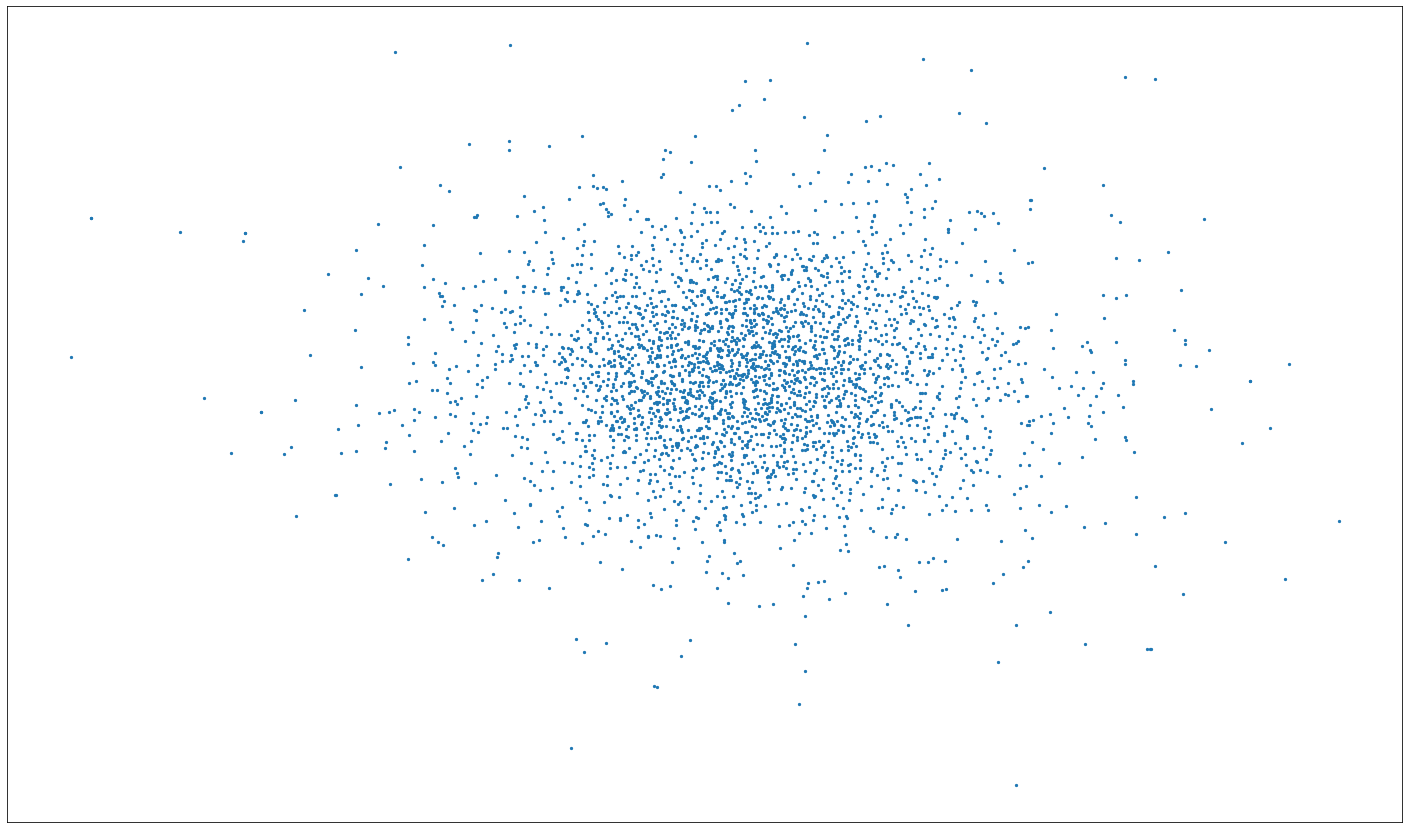

In [21]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(SCC, pos_scc, node_size=5)
plt.show()

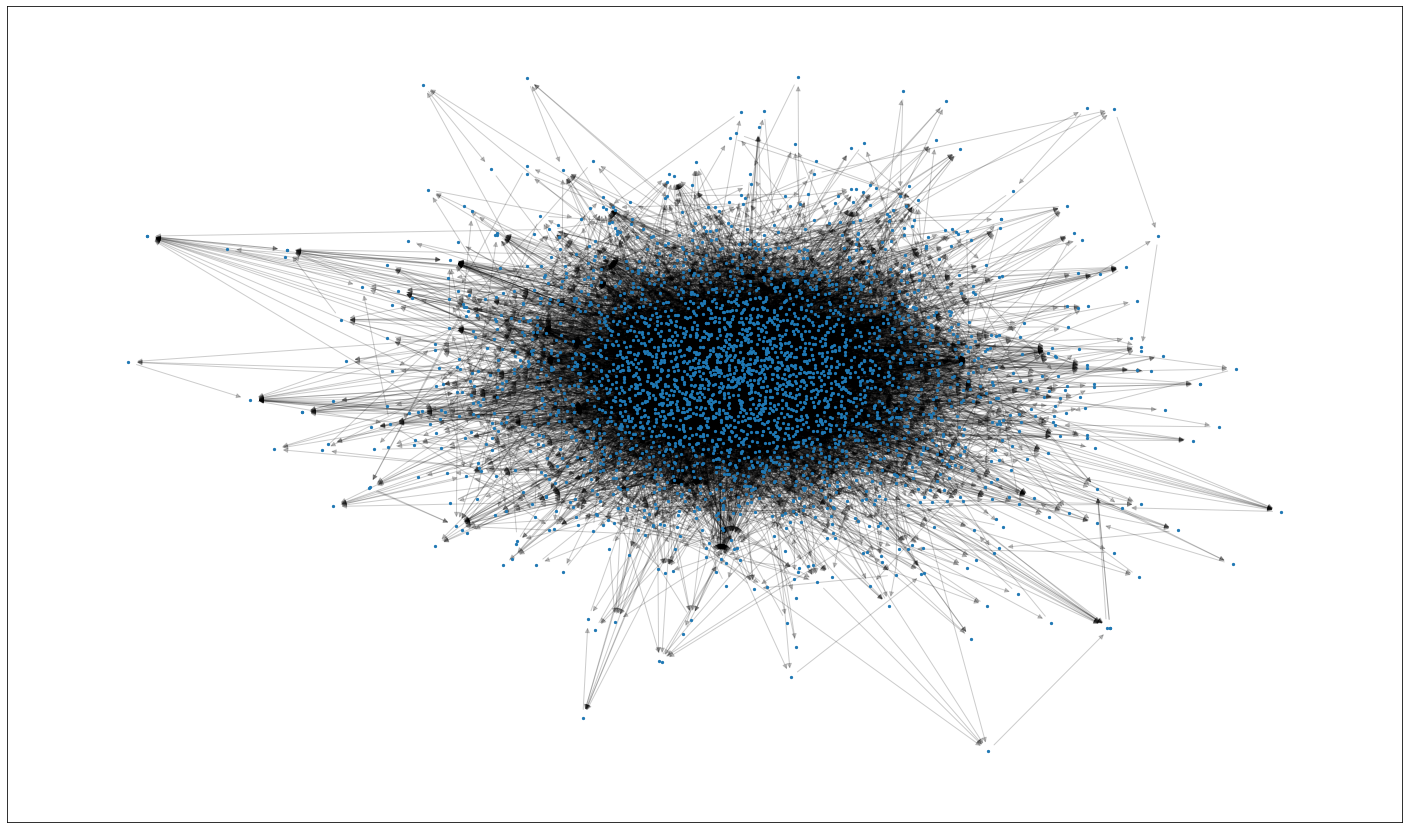

In [45]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(SCC, pos_scc, node_size=5)
nx.draw_networkx_edges(SCC, pos_scc, alpha=0.2)
plt.show()

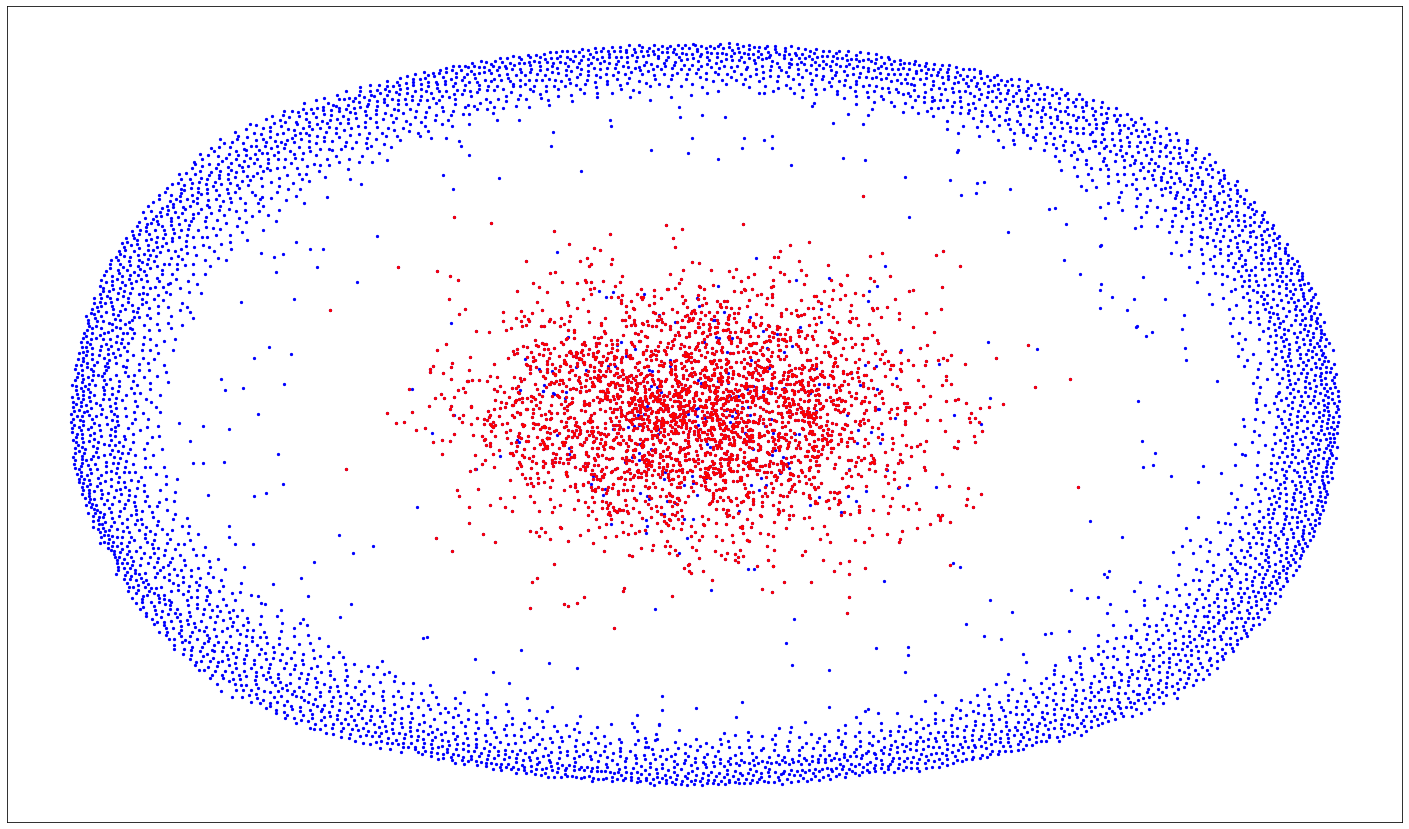

In [23]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(SCC, pos,node_color = 'red', node_size=5)
plt.show()

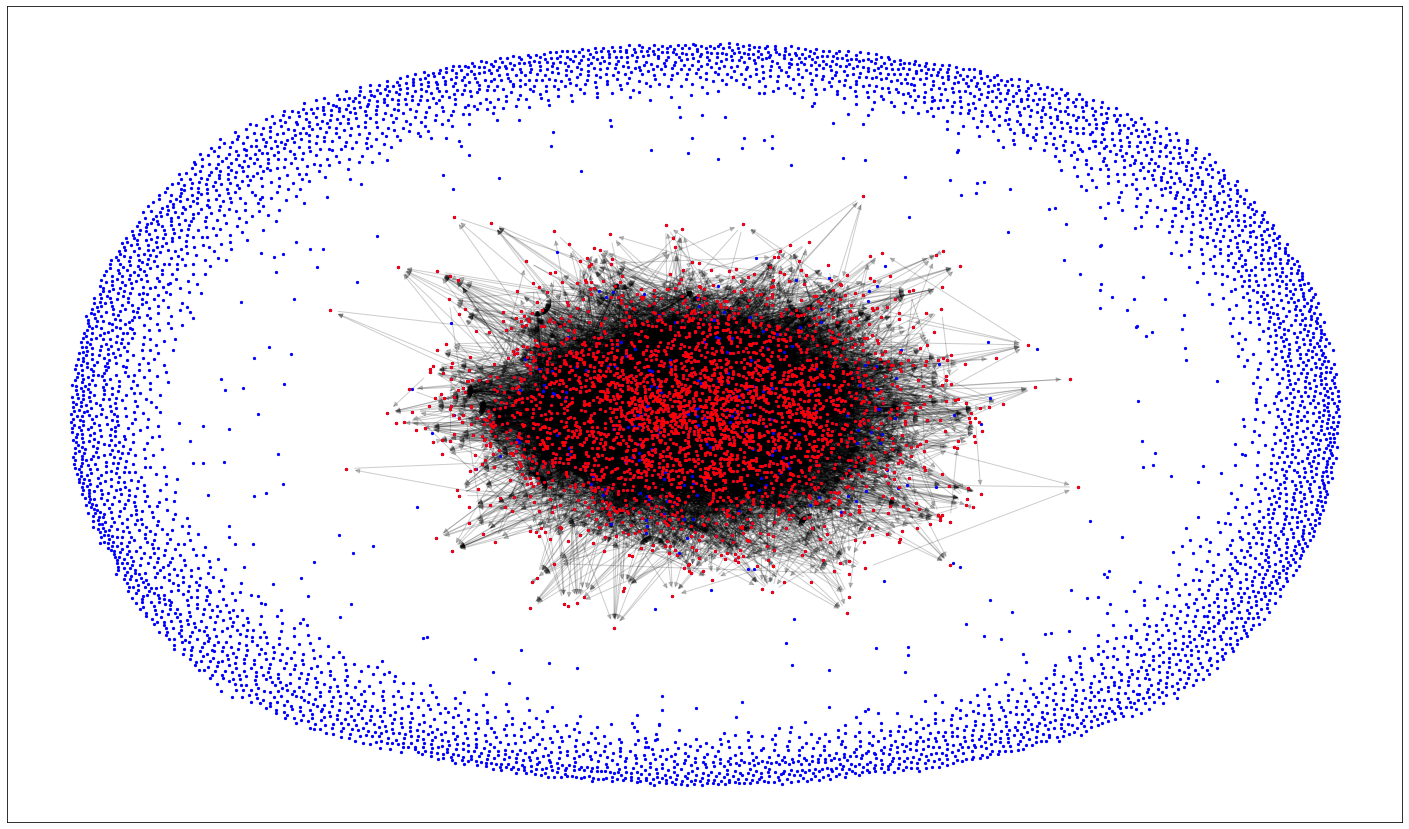

In [26]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(SCC, pos,node_color = 'red', node_size=5)
nx.draw_networkx_edges(SCC, pos, alpha=0.2)
plt.show()

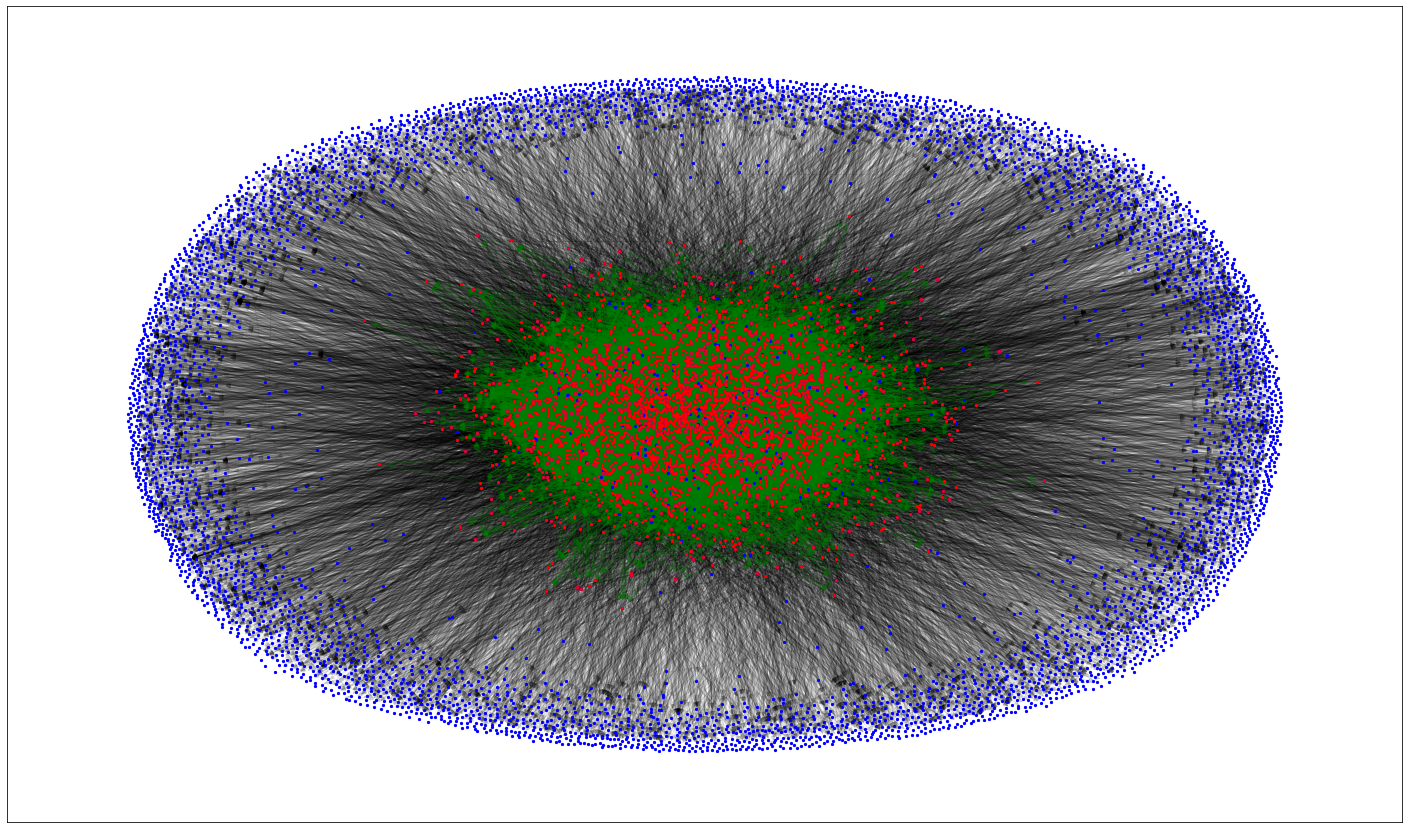

In [27]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(SCC, pos,node_color = 'red', node_size=5)
nx.draw_networkx_edges(G, pos, alpha=0.1 ,edge_color = 'black')
nx.draw_networkx_edges(SCC, pos, alpha=0.3 ,edge_color = 'green')
plt.show()

In [28]:
largest_wcc = max(nx.weakly_connected_components(G), key=len)

In [29]:
WCC = G.subgraph(largest_wcc)

In [30]:
print(list(WCC.edges))

[('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('0', '7'), ('0', '8'), ('0', '9'), ('0', '10'), ('6', '21'), ('6', '327'), ('6', '619'), ('6', '1828'), ('6', '2173'), ('6', '2201'), ('6', '2743'), ('6', '2744'), ('6', '2745'), ('6', '2746'), ('8', '372'), ('8', '437'), ('8', '816'), ('8', '1826'), ('8', '1913'), ('8', '2303'), ('8', '2734'), ('8', '2735'), ('8', '2736'), ('8', '2737'), ('9', '35'), ('9', '321'), ('9', '446'), ('9', '1184'), ('9', '1542'), ('9', '2738'), ('9', '2739'), ('9', '2740'), ('9', '2741'), ('9', '2742'), ('10', '170'), ('10', '556'), ('10', '558'), ('10', '882'), ('10', '1059'), ('10', '2752'), ('10', '2753'), ('10', '2754'), ('10', '2755'), ('10', '2756'), ('327', '1458'), ('327', '2111'), ('327', '3941'), ('327', '4240'), ('327', '4271'), ('327', '5330'), ('327', '5331'), ('327', '5332'), ('327', '5333'), ('327', '5334'), ('1828', '60'), ('1828', '579'), ('1828', '1119'), ('1828', '1561'), ('1828', '2756'), ('1828', '3296'), ('1828',

In [31]:
print(nx.info(WCC))

Name: 
Type: DiGraph
Number of nodes: 8717
Number of edges: 31525
Average in degree:   3.6165
Average out degree:   3.6165


In [ ]:
print(nx.distance_measures.diameter(WCC))

In [32]:
pos_wcc = nx.spring_layout(WCC)

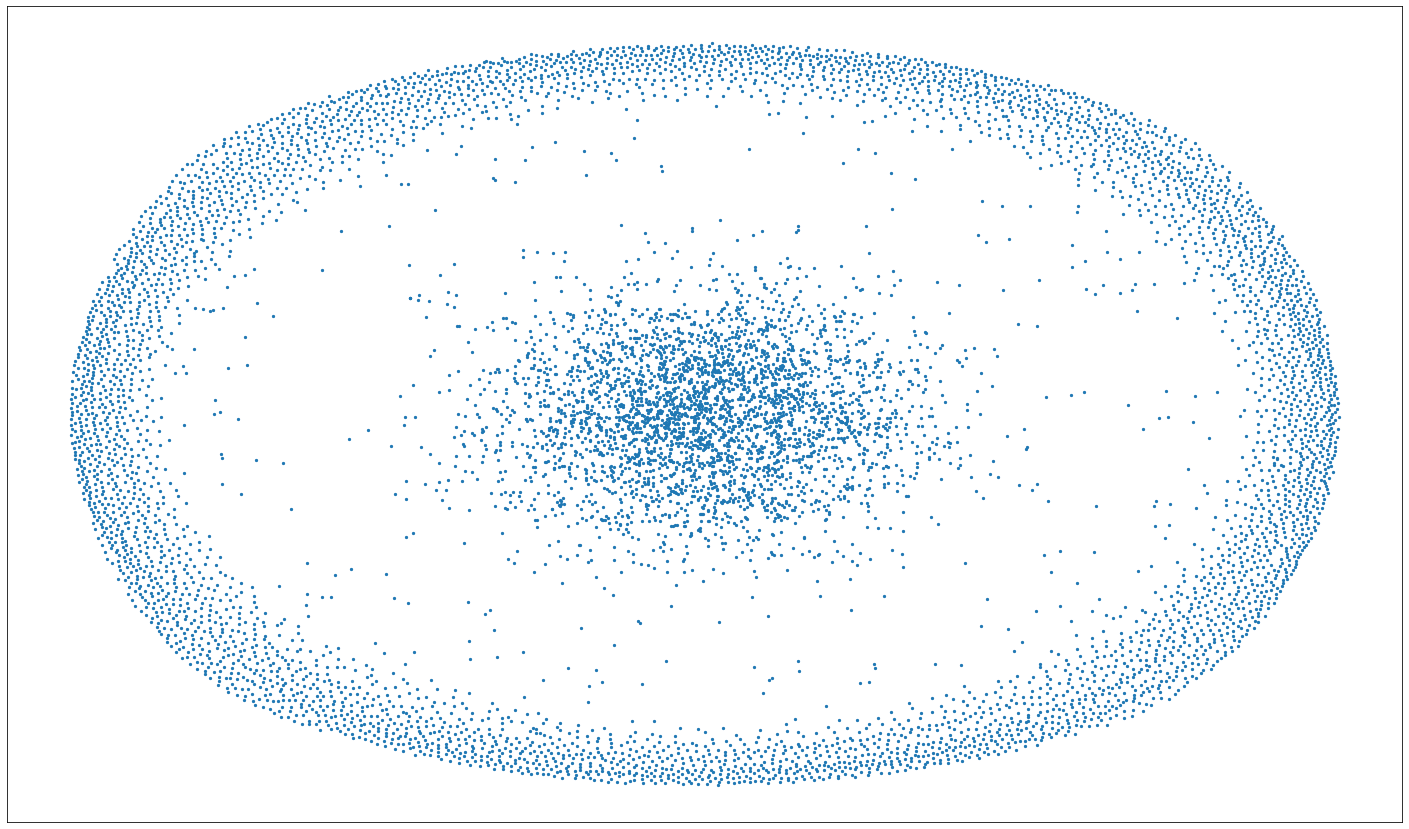

In [33]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(WCC, pos_wcc, node_size=5)
plt.show()

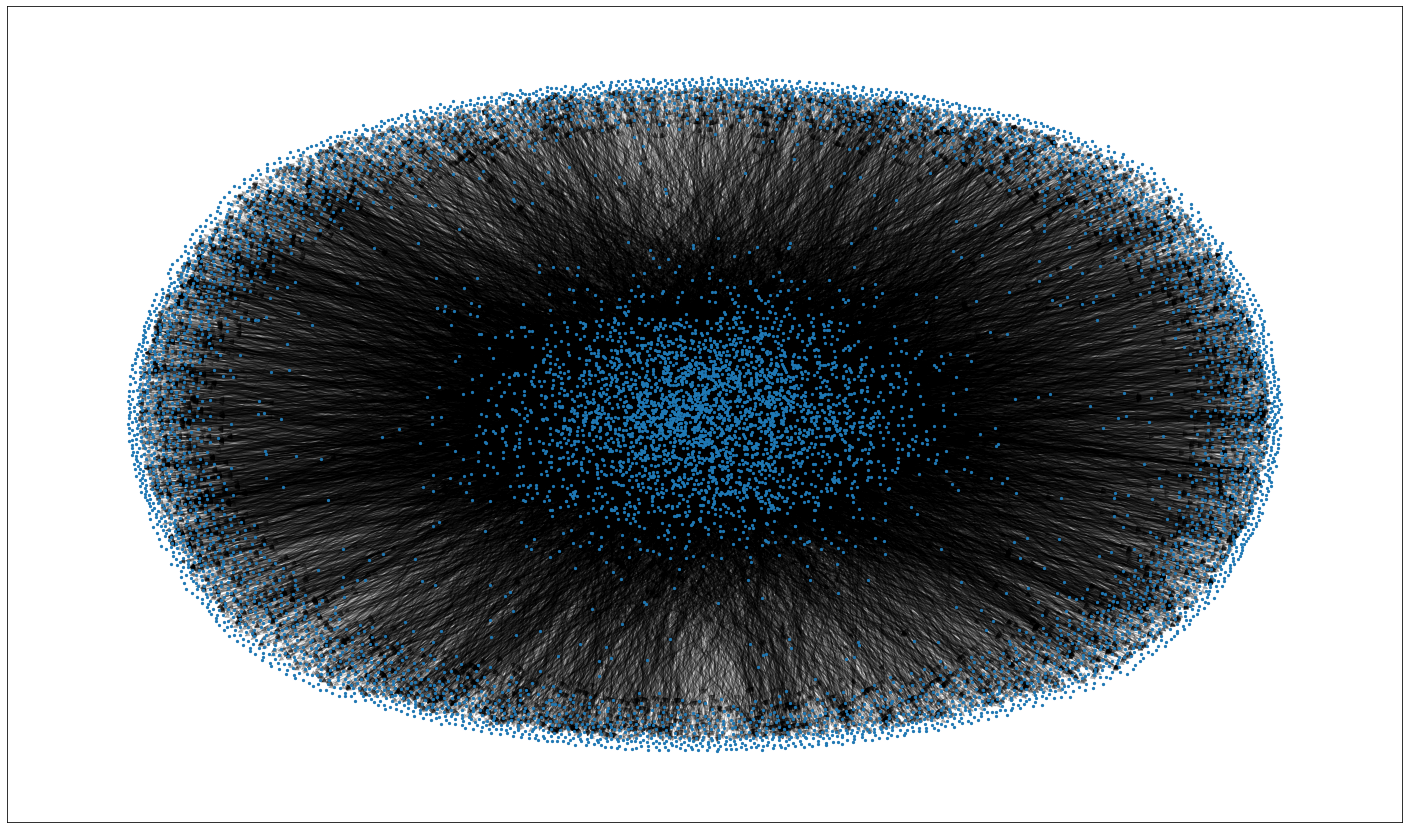

In [34]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(WCC, pos_wcc, node_size=5)
nx.draw_networkx_edges(WCC, pos_wcc, alpha=0.2)
plt.show()

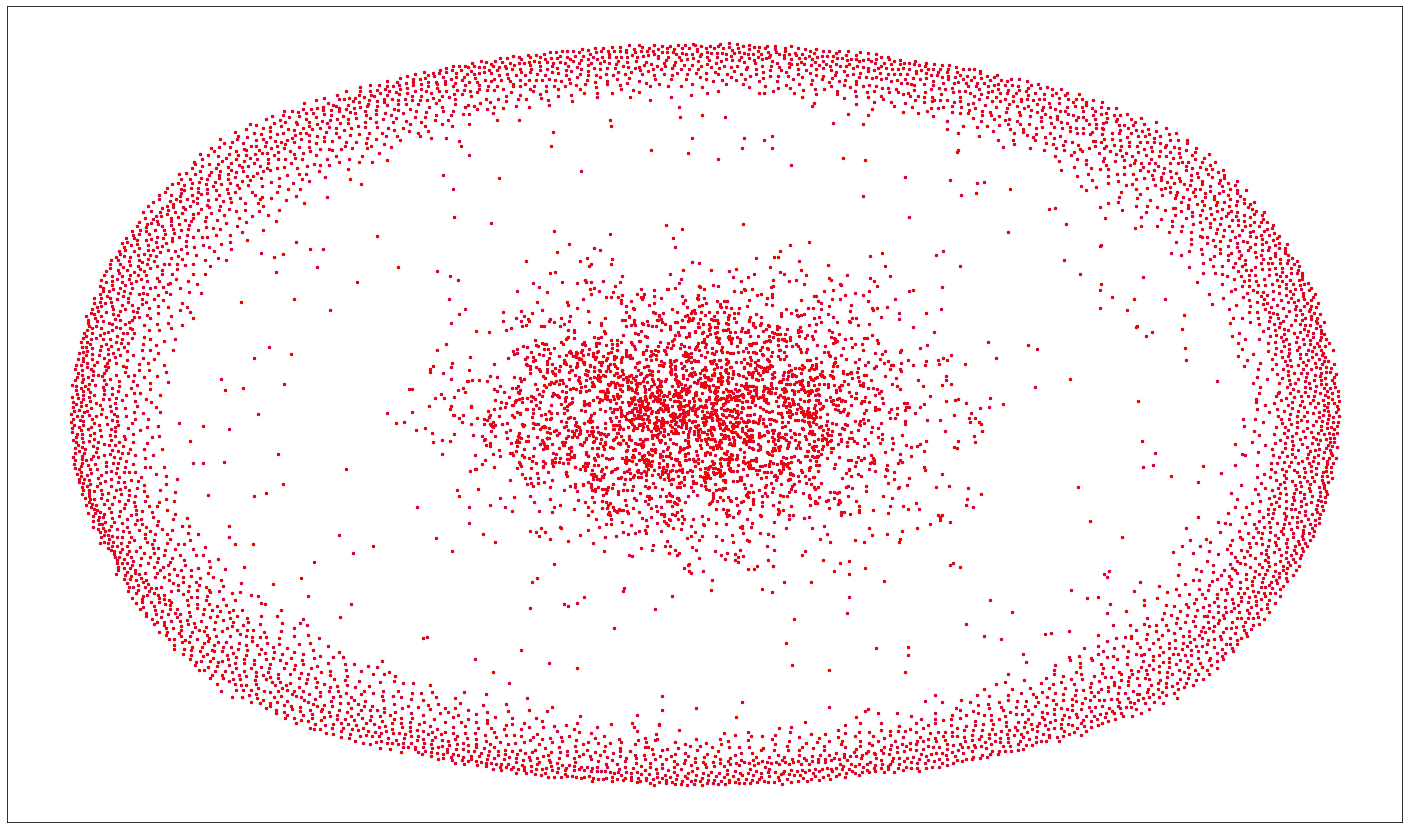

In [35]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(WCC, pos,node_color = 'red', node_size=5)
plt.show()

In [36]:
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(G, pos,node_color = 'blue', node_size=5)
nx.draw_networkx_nodes(WCC, pos,node_color = 'red', node_size=5)
nx.draw_networkx_edges(WCC, pos, alpha=0.2)
plt.show()

In [37]:
dict = {}
max_l = 0
selected_node = []

while len(selected_node) <= int(len(G.nodes)/10):
    start_node = random.choice(list(G.nodes))
    if start_node not in selected_node:
        selected_node.append(start_node)
        l_bfs = len(list(nx.bfs_edges(G,start_node)))

        if l_bfs >= max_l:
            max_l = l_bfs

        dict[start_node] = l_bfs

print(selected_node)

['2745', '3574', '7375', '5844', '4269', '1318', '864', '2461', '5946', '1382', '2677', '4309', '7173', '5167', '7228', '4660', '2725', '7610', '5406', '1568', '5351', '6335', '3526', '7113', '19', '5267', '8436', '2009', '709', '2105', '6770', '8570', '8708', '5559', '5940', '6864', '867', '6372', '3166', '4740', '3391', '910', '2096', '4416', '2544', '5764', '1920', '7185', '4926', '2180', '5966', '174', '701', '887', '2869', '6023', '930', '2118', '5566', '464', '8213', '878', '3731', '6116', '7040', '5312', '1657', '7344', '3007', '5395', '1496', '3482', '5848', '215', '7260', '2018', '4686', '866', '742', '5286', '4996', '3269', '2995', '8194', '4053', '7667', '700', '2035', '5320', '8124', '3344', '7662', '5851', '3151', '8146', '2092', '5048', '2911', '387', '3090', '6383', '6348', '5884', '7154', '438', '1284', '3177', '7070', '4655', '1076', '2611', '6633', '7096', '4443', '4181', '1629', '2466', '7791', '8635', '8498', '6863', '457', '4834', '1080', '4313', '5003', '4610', '7

In [38]:
print(dict)

{'2745': 8521, '3574': 0, '7375': 0, '5844': 8521, '4269': 0, '1318': 0, '864': 0, '2461': 8521, '5946': 8521, '1382': 8521, '2677': 1, '4309': 0, '7173': 8521, '5167': 0, '7228': 0, '4660': 0, '2725': 8521, '7610': 0, '5406': 5, '1568': 0, '5351': 8521, '6335': 0, '3526': 0, '7113': 0, '19': 0, '5267': 0, '8436': 8521, '2009': 11, '709': 8521, '2105': 0, '6770': 0, '8570': 0, '8708': 0, '5559': 0, '5940': 0, '6864': 0, '867': 0, '6372': 0, '3166': 0, '4740': 8521, '3391': 8521, '910': 8521, '2096': 0, '4416': 0, '2544': 0, '5764': 8521, '1920': 8521, '7185': 0, '4926': 0, '2180': 0, '5966': 0, '174': 8521, '701': 0, '887': 8521, '2869': 8521, '6023': 8521, '930': 0, '2118': 8521, '5566': 0, '464': 8521, '8213': 0, '878': 8521, '3731': 8521, '6116': 0, '7040': 0, '5312': 0, '1657': 0, '7344': 8521, '3007': 0, '5395': 0, '1496': 8521, '3482': 0, '5848': 8521, '215': 8521, '7260': 0, '2018': 0, '4686': 8521, '866': 8521, '742': 0, '5286': 0, '4996': 0, '3269': 0, '2995': 1, '8194': 1, '4

In [39]:
print(len(G.nodes))

8717


In [40]:
print(max_l)

8525


In [41]:
s_node = []
for keys , values in dict.items():
    if values == max_l:
        s_node.append(keys)

In [42]:
print(len(s_node))
print(s_node)

4
['2558', '2302', '492', '1337']


In [43]:
list(nx.bfs_edges(G,s_node[0]))

[('2558', '312'),
 ('2558', '1806'),
 ('2558', '2110'),
 ('2558', '2559'),
 ('2558', '2560'),
 ('2558', '2561'),
 ('2558', '2562'),
 ('2558', '2563'),
 ('2558', '2564'),
 ('2558', '2565'),
 ('2559', '280'),
 ('2559', '1771'),
 ('2559', '1939'),
 ('2559', '3239'),
 ('2559', '4176'),
 ('2559', '5120'),
 ('2559', '5174'),
 ('2559', '5175'),
 ('2559', '5176'),
 ('2561', '1878'),
 ('2561', '2043'),
 ('2561', '3197'),
 ('2561', '3594'),
 ('2561', '4170'),
 ('2561', '5177'),
 ('2561', '5178'),
 ('2561', '5179'),
 ('2561', '5180'),
 ('2561', '5181'),
 ('2562', '3'),
 ('2562', '680'),
 ('2562', '1821'),
 ('2562', '2649'),
 ('2562', '2875'),
 ('2562', '3906'),
 ('2562', '4226'),
 ('2562', '4971'),
 ('2562', '5201'),
 ('2562', '5202'),
 ('2564', '27'),
 ('2564', '635'),
 ('2564', '838'),
 ('2564', '2640'),
 ('2564', '2812'),
 ('2564', '5182'),
 ('2564', '5183'),
 ('2564', '5184'),
 ('2564', '5185'),
 ('2564', '5186'),
 ('280', '356'),
 ('280', '1052'),
 ('280', '1458'),
 ('280', '1569'),
 ('280',

In [44]:
GC = nx.Graph()
GC.add_edges_from(list(nx.bfs_edges(G,s_node[0])))